<a href="https://colab.research.google.com/github/reg4762/PembelajaranMesin_Ganjil_2024/blob/main/JobSheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Job Sheet 3 Regresi
## Nama     : Regita Delya Putri
## No. Absen: 21
## NIM      : 2241720137
## Kelas    : TI-3F



---

# PRAKTIKUM 1

## Langkah 1: Persiapan Data

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

## Langkah 2: Import Library

In [ ]:
# import package
import numpy as np
import pandas as pd

## Langkah 3: Baca Data

In [ ]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/week3/dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Langkah 4: Pemahaman Terhadap Data

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

# data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Langkah 5: Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

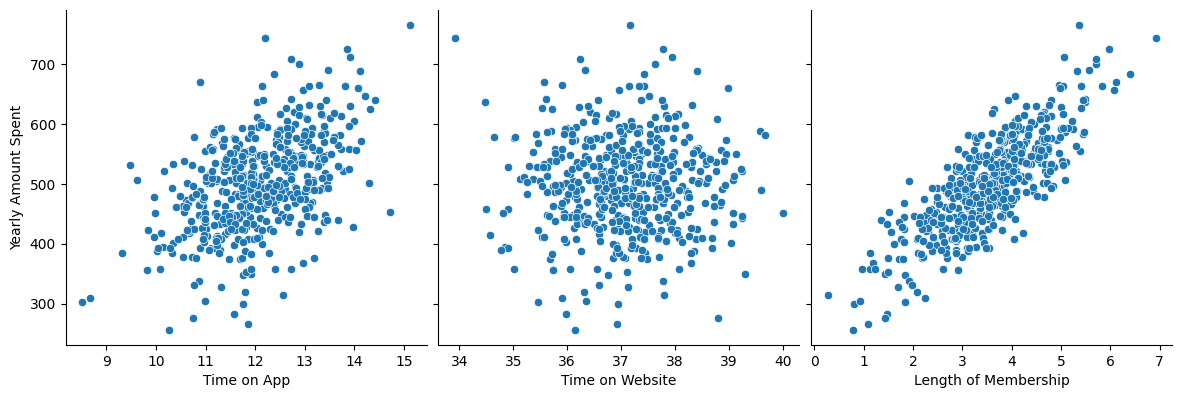

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

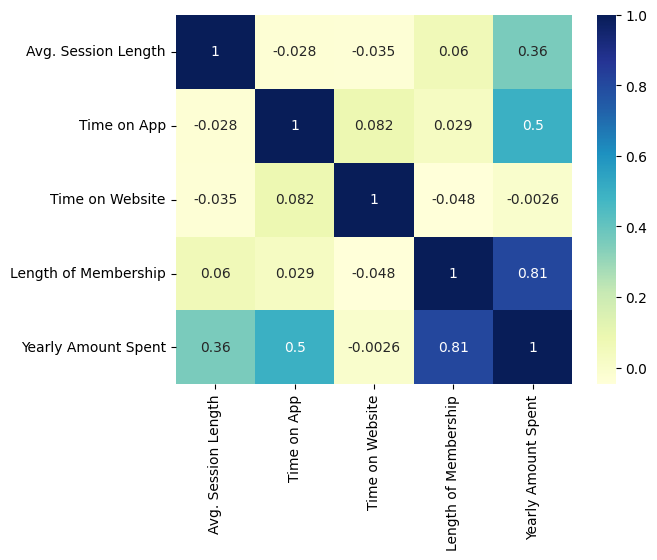

In [ ]:
# visualisasi korelasi dengan heatmap
# Untuk membuktikan lagi korelasinya
numeric_data = data.select_dtypes(include=[float, int])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Langkah 6: Regresi Linier

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.shape

(350,)

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

,0
const,265.248299
Length of Membership,66.301522


In [ ]:
type(lr.params)

pandas.core.series.Series

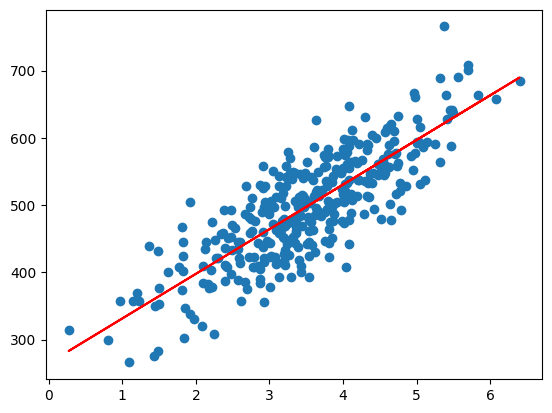

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

## Langkah 7: Analisis Residual

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

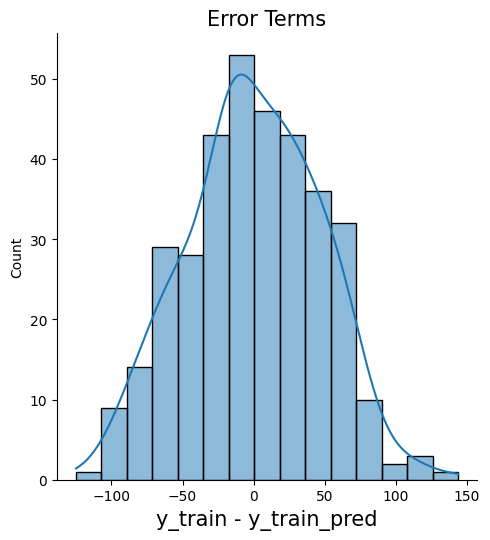

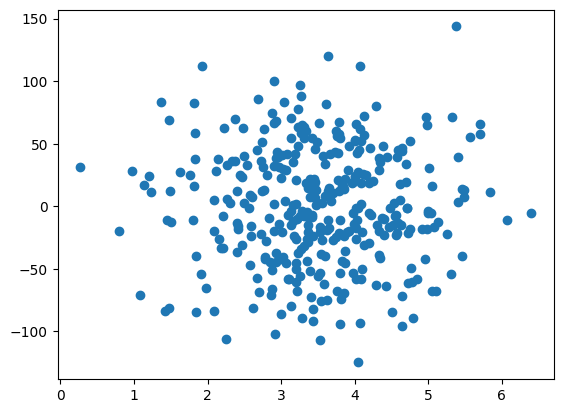

In [ ]:
# Histogram residual
fig = plt.figure()
sns.displot(res, bins=15, kde=True)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

## Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

In [ ]:
r_squared

0.611948913768747

## Langkah 9: Visualisasi Hasil

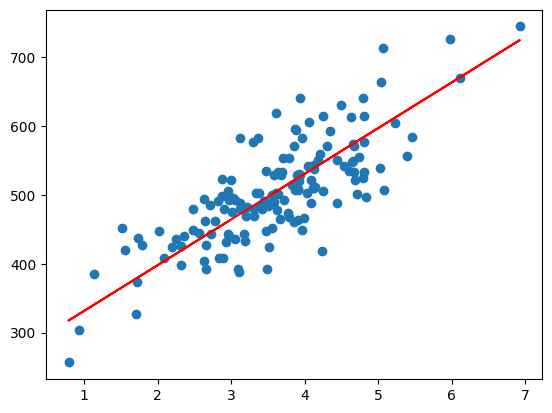

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Praktikum 2

## Mengimpor Library:


In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Mengimpor Dataset:

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/week3/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja


## Feature Scaling:

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))


## Fitting SVR ke Dataset:

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
y = y.ravel()
regressor.fit(X, y)

SVR()


## Visualisasi Hasil SVR:

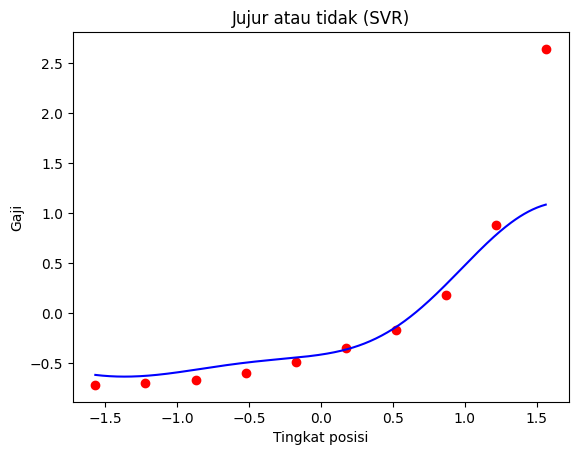

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X)[0], max(X)[0], 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()


## Prediksi Hasil:

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))


## Menampilkan Hasil:

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]



## Evaluasi Model SVR

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# TUGAS PRAKTIKUM

## Persiapan Data

In [54]:
# import package
import numpy as np
import pandas as pd

In [55]:
# baca data dari file CSV
data_insurance = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/week3/insurance.csv')

In [57]:
# melihat beberapa data awal
data_insurance.head()

# mengecek ukuran data
data_insurance.shape

# informasi tentang data
data_insurance.info()

# deskripsi data
data_insurance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Melakukan Proses Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder() # membuat objek dari LabelEncoder
data_insurance['sex'] = le.fit_transform(data_insurance['sex']) # proses encoding
data_insurance['smoker'] = le.fit_transform(data_insurance['smoker']) # proses encoding

## Visualisasi Data

In [59]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

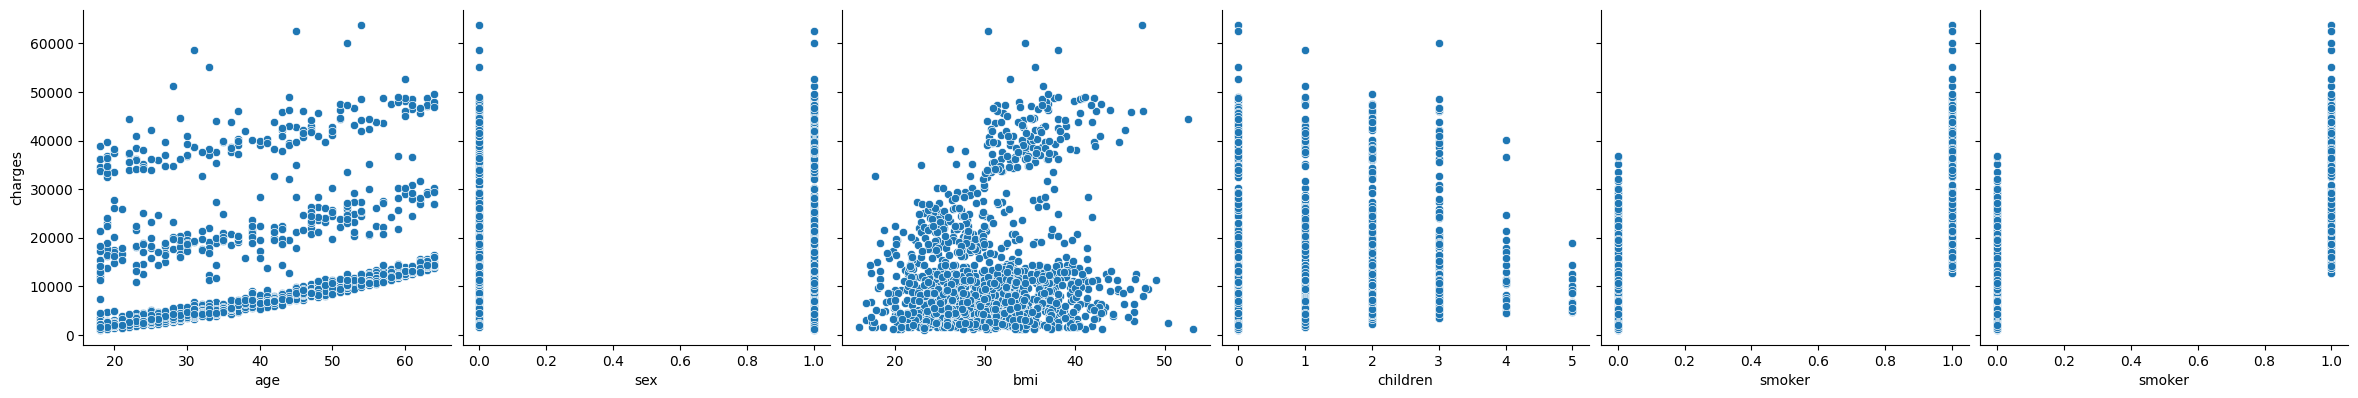

In [60]:
# visualisasi data dengan pairplot
sns.pairplot(data_insurance, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'smoker'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

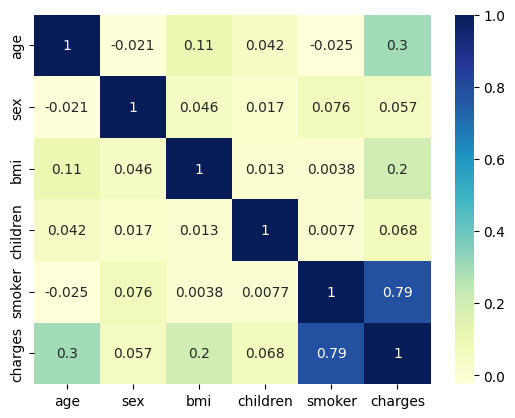

In [61]:
# visualisasi korelasi dengan heatmap
# Untuk membuktikan lagi korelasinya
numeric_data = data_insurance.select_dtypes(include=[float, int])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Tugas 1: Multiple Linear Regression



1.   Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).




In [62]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data_insurance[['age', 'bmi', 'smoker']]
y = data_insurance['charges']

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [63]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

3. Lakukan feature scaling jika diperlukan.

In [64]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [65]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [66]:
# Melatih model dengan data training
model.fit(X_train, y_train)


LinearRegression()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [67]:
# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

In [68]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print("R-squared:", r2)
print("MSE:", mse)
print("MAE:", mae)


R-squared: 0.7777782410843159
MSE: 32266086.037517134
MAE: 3934.947395925351


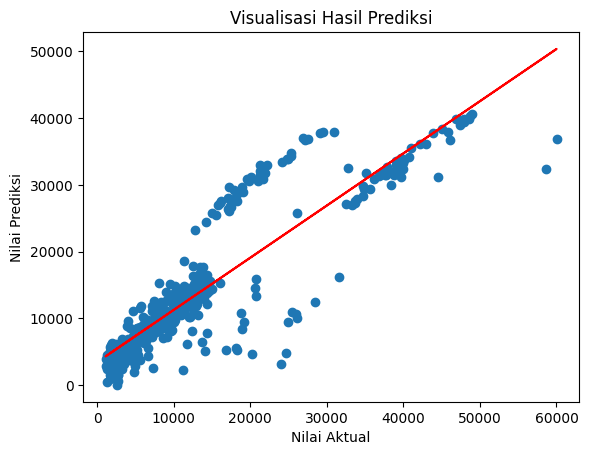

In [69]:
import matplotlib.pyplot as plt
import numpy as np
# Visualisasi data uji dan hasil prediksi
plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Visualisasi Hasil Prediksi")

# Menambahkan garis regresi
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r")

plt.show()
